In [34]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# define matrix containing the values
rows=int(input("Enter number of rows"))
cols=int(input("Enter number of Columns"))
A=np.zeros((rows,cols))

# Enter values

for i in range(rows):
    for j in range(cols):
        A[i,j]=float(input(f"Enter the value of {i}th row and {j}th column"))

print("Matrix : ",A)

Matrix :  [[0.78 0.8  0.81 0.75 0.77 0.78]
 [0.85 0.85 0.92 0.86 0.81 0.83]
 [0.93 0.92 0.95 0.89 0.89 0.83]
 [1.14 0.97 0.98 0.88 0.86 0.83]
 [0.97 0.86 0.78 0.76 0.76 0.75]]


In [21]:
# Calculate the sum of rows
Sum_of_rows=np.sum(A,axis=1)
Sum_of_rows    

array([4.69, 5.12, 5.41, 5.66, 4.88])

In [22]:
# Calculate the sum of Columns
Sum_of_cols=np.sum(A,axis=0)
Sum_of_cols

array([4.67, 4.4 , 4.44, 4.14, 4.09, 4.02])

In [23]:
Total_sum_of_elements=np.sum(Sum_of_cols,axis=0)
Total_sum_of_elements

25.759999999999998

In [24]:
# Calculate Sum of Sqauares total
SST=0
for i in range(rows):
    for j in range(cols):
        SST+=A[i,j]**2

print(SST)
SST-=Total_sum_of_elements**2/(rows*cols)
print("Sum of total :",SST)

22.3416
Sum of total : 0.22234666666667025


In [25]:
# Calculation on treatments
SStreatments=0
print(Sum_of_rows.shape)
for i in range(Sum_of_rows.shape[0]):
    SStreatments+=Sum_of_rows[i]**2
SStreatments/=Sum_of_cols.shape[0]
SStreatments-=Total_sum_of_elements**2/(rows*cols)
print("Sum of Treatments :",SStreatments)

(5,)
Sum of Treatments : 0.10218000000000416


In [26]:
# Calculation of Block
SSblock=0
print(Sum_of_cols.shape)
for i in range(Sum_of_cols.shape[0]):
    SSblock+=Sum_of_cols[i]**2
SSblock/=Sum_of_rows.shape[0]
SSblock-=Total_sum_of_elements**2/(rows*cols)
print("Sum of Blocks :",SSblock)

(6,)
Sum of Blocks : 0.06286666666666818


In [27]:
# Error
SSerror=SST-SStreatments-SSblock
print("Error",SSerror)

Error 0.05729999999999791


In [28]:
# Calculation of degrees of Freedom
dft=Sum_of_rows.shape[0]-1
dfb=Sum_of_cols.shape[0]-1
dfw=dft*dfb
dftotal=rows*cols-1

In [29]:
# Calculation of Mean squares
mst=(SStreatments/dft)
msb=SSblock/dfb
mse=SSerror/dfw

In [30]:
Ftreat=mst/mse
Fblock=msb/mse

In [31]:
# create the ANOVA table
anova_table = pd.DataFrame({'Source of Variation': ['Between Treatments', 'Blocks','Error ', 'Total'],
    'Sum of Squares': [SStreatments, SSblock,SSerror, SST],
    'Degrees of Freedom': [dft, dfb, dfw,dftotal],
    'Mean Square': [mst, msb, mse,np.nan],
    'F value': [Ftreat, Fblock, np.nan,np.nan],
})

# set the index to the source column
anova_table.set_index('Source of Variation', inplace=True)

# display the ANOVA table
print(anova_table)

                     Sum of Squares  Degrees of Freedom  Mean Square   F value
Source of Variation                                                           
Between Treatments         0.102180                   4     0.025545  8.916230
Blocks                     0.062867                   5     0.012573  4.388598
Error                      0.057300                  20     0.002865       NaN
Total                      0.222347                  29          NaN       NaN


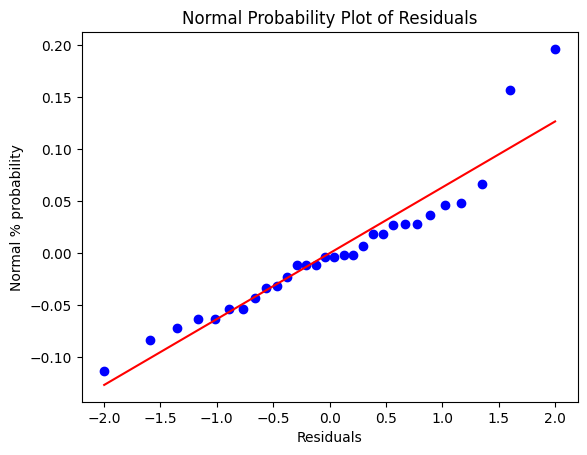

In [36]:
# create the residual plot
residuals = []
for i in range(rows):
    for j in range(cols):
        residuals.append(A[i,j]-Sum_of_rows[i]/Sum_of_cols.shape[0])  # Sum_of_rows[i]/Sum_of_cols.shape[0]
#stats.probplot(residuals, plot=plt)
stats.probplot(residuals, dist="norm", plot=plt)

# Calculate normal scores


# set the title and labels
plt.title('Normal Probability Plot of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Normal % probability')

# show the plot
plt.show()


### COMMENTS :

- As the value of the F value found (8.9162) is less than the value found from F from the table with degrees of freedom 4,20 which is    (2.866) so we can say that the Nozzle design affects the shape factor. Thus, we rejectd the NULL Hypothesis and accept Alternate Hypothesis.

- The probability plot don't show any abnormalities in the data. Though some outliers can be seen at the ends.